<a href="https://colab.research.google.com/github/TYDTYD/Assignment/blob/main/%EC%BB%B4%ED%93%A8%ED%84%B0%EB%B9%84%EC%A0%84_Assignment_1_202002965_%EC%9D%B4%EC%8A%B9%EB%AF%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [Computer Vision] Assignment #1

본 과제의 목적은 기본적인 이미지 처리 과정을 이해하는 것을 목표로 함.

* 이미지 불러오기, 색 변환, 콘벌루션, 이미지 필터링에 대한 전반적인 내용을 다루고 있음.
* 과제는 스스로 수행하는 것을 원칙으로 함 (잘 모르겠으면 구글링해서 직접 결과물을 확인하는 것을 권장함).
* import 하는 라이브러리 외에 python 내에서 사용 가능한 라이브러리 자유롭게 사용 가능.
* 정답을 제출하는 것도 중요하지만, 해당 과정을 통해 이미지 처리, 콘벌루션, 필터링에 대한 이해를 하는 것이 중요함.

## 1. Data Preparation (8 points)

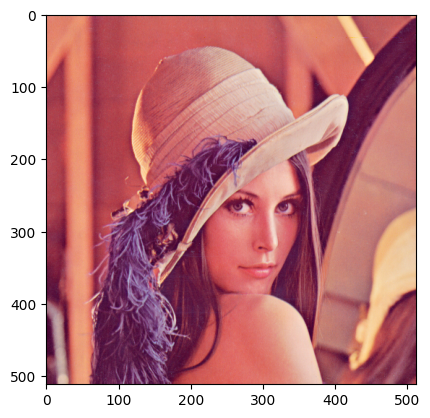

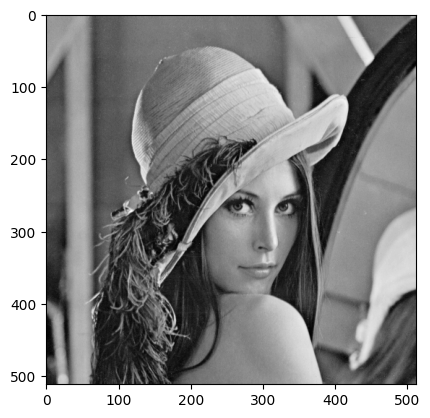

In [90]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# 아래의 링크에서 레나 이미지 준비
# https://ko.wikipedia.org/wiki/%EB%A0%88%EB%82%98_(%EC%9D%B4%EB%AF%B8%EC%A7%80)

# 이미지를 colab 에 업로드
# 좌측 카테고리에 폴더 모양 클릭 후그래그를 통한 업로드

### 이미지 불러오기
image_path = '/content/Lenna.png'
image = Image.open(image_path)


### 이미지 변환
# PIL.Image 를 np.array 로 변환
image = np.array(image)


### 해당 이미지 시각화
plt.imshow(image)
plt.show()

### rgb2gray 함수 정의
# 해당 함수는 RGB 이미지를 받아서 gray 이미지를 리턴
# 변환공식: G = 0.2989 * R + 0.5870 * G + 0.1140 * B
def rgb2gray(image):
  height, width = image.shape[0], image.shape[1]
  gray_image = np.zeros((height,width,1))
  for i in range(height):
    for j in range(width):
      gray_value = image[i, j, 0] * 0.2989 + image[i, j, 1] * 0.5870 + image[i, j, 2] * 0.1140
      gray_image[i, j] = gray_value
  return gray_image

### RGB를 gray 이미지로 변환
image_gray = rgb2gray(image)

### 해당 이미지 시각화
plt.imshow(image_gray, cmap='gray')
plt.show()

## 2. Convolution from scratch (10 points)

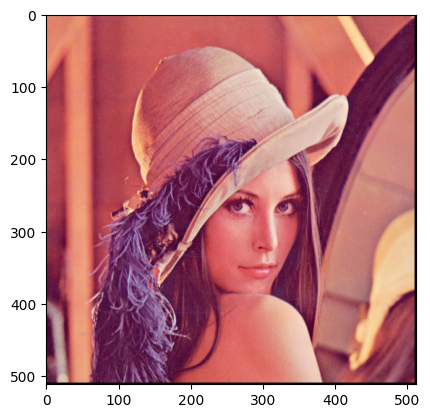

In [91]:
### identity 커널 정의
# 해당 커널을 필터링해도 이미지를 변화시키지 않음
kernel = [[0,0,0],[0,1,0],[0,0,0]]


### 'conv2d' 함수 정의
# 해당 함수는 이미지와 커널을 입력으로 받음
# 'np.pad'를 활용하여 이미지 외부를 0으로 패딩(padding)할 수 있음
# 패딩 사이즈는 (사용하는 이미지에 컨벌루션이 동작할 수 있도록) 임의로 조절 가능
def conv2d(image, kernel):
  pad_width = len(kernel)//2
  pad_image = np.pad(image,((pad_width,pad_width),(pad_width,pad_width),(0,0)),'constant',constant_values=0)
  height, width, channels = image.shape[0], image.shape[1], image.shape[2]
  output = np.zeros_like(image)
  for i in range(pad_width, height-pad_width):
    for j in range(pad_width, width-pad_width):
      for k in range(channels):
        patch = pad_image[i - pad_width:i + pad_width + 1, j - pad_width:j + pad_width + 1, k]
        output[i - pad_width, j - pad_width, k] = np.sum(kernel * patch)
  return output

### 이미지에 컨벌루션 적용
image_conv = conv2d(image,kernel)

### 해당 이미지 시각화
plt.imshow(image_conv)
plt.show()

## 3. Peak Signal-to-Noise Ratio (PSNR) (6 points)

In [98]:
from math import log10, sqrt

### 'PSNR' 함수 정의
# 해당 함수는 원본 이미지와 필터링된 이미지를 받아 두 이미지의 quality 비교
# 함수 구현은 다음의 웹페이지 참조
# https://en.wikipedia.org/wiki/Peak_signal-to-noise_ratio
def PSNR(original, filtered):
  max = 255
  mse = (np.subtract(original,filtered)**2).mean()
  if mse == 0:
    return float('INF')
  psnr = 20 * log10(max)- 10 * log10(mse)
  return psnr

## 4. Average Filter (8 points)

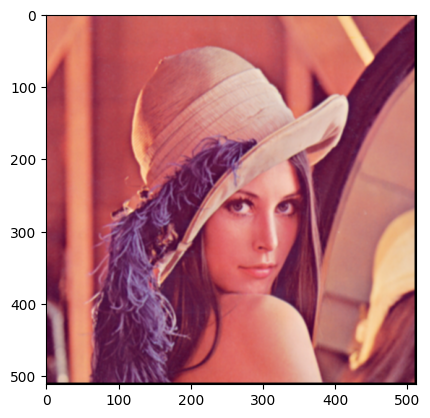

34.396518864218855


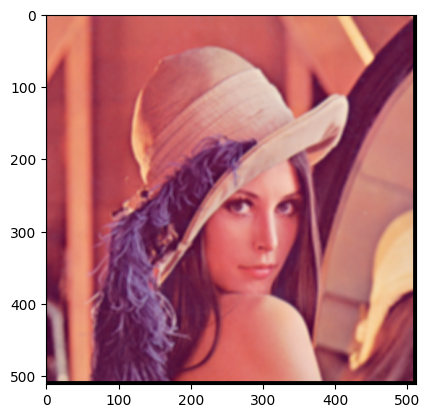

32.92247866523512


In [96]:
### 3 by 3 평균 블러 커널 정의
kernel_avg = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]

### 불러온 이미지에 커널 적용
image_conv = conv2d(image,kernel_avg)


### 해당 이미지 시각화
plt.imshow(image_conv)
plt.show()

### PSNR 계산
# 원본 이미지와, 컨벌루션 된 이미지 활용
psnr = PSNR(image,image_conv)
print(psnr)


### 5 by 5 평균 블러 커널 정의
kernel_avg = [[1/25,1/25,1/25,1/25,1/25],
              [1/25,1/25,1/25,1/25,1/25],
              [1/25,1/25,1/25,1/25,1/25],
              [1/25,1/25,1/25,1/25,1/25],
              [1/25,1/25,1/25,1/25,1/25]]


### 불러온 이미지에 커널 적용
image_conv = conv2d(image,kernel_avg)


### 해당 이미지 시각화
plt.imshow(image_conv)
plt.show()

### PSNR 계산
psnr = PSNR(image,image_conv)
print(psnr)

## 5. Noise Reduction (8 points)

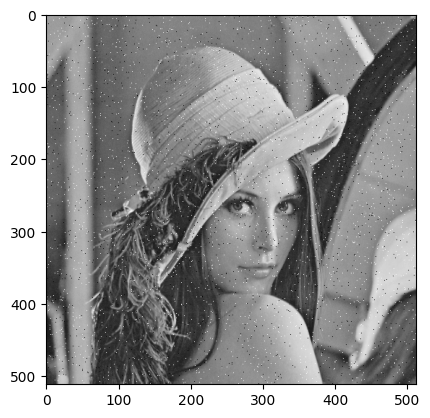

23.626220539732675


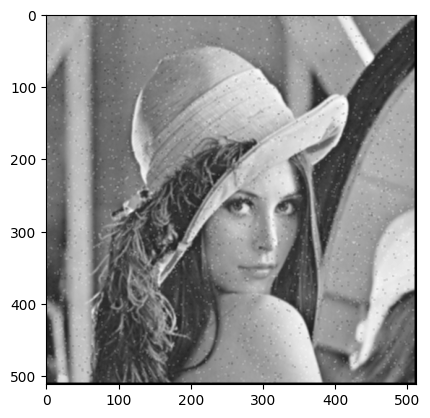

25.006648578865025


In [97]:
from random import random

### 'salt_and_pepper' 함수 정의
# 해당 노이즈는 이미지에서 무작위로 일부 픽셀이 흰색 (salt) 또는 검은색 (pepper)로 변경
# 특정한 픽셀 값은 검정(0)으로 만들고, 또 다른 특정 픽셀에 대해서는 흰색(255)으로 변환
# 전체 픽셀 수를 고려하여 확률에 따라 노이즈화 진행
def salt_and_pepper(image, prob):
  height, width, dim = image.shape[0], image.shape[1], image.shape[2]
  output=np.copy(image)
  for i in range(height):
    for j in range(width):
      for k in range(dim):
        number=random()
        if number < prob/2:
          output[i,j,k]=0
        elif random() < prob:
          output[i,j,k]=255
  return output



### 이미지에 salt_and_pepper 함수 적용
image_noise = salt_and_pepper(image_gray,0.01)


### 해당 이미지 시각화
plt.imshow(image_noise,cmap='gray')
plt.show()

### PSNR 계산
psnr = PSNR(image_gray,image_noise)
print(psnr)

### 3 by 3 평균 블러 커널 활용하여 denoise 수행
kernel_avg = [[1/9,1/9,1/9],[1/9,1/9,1/9],[1/9,1/9,1/9]]
image_denoise = conv2d(image_noise,kernel_avg)


### 해당 이미지 시각화
plt.imshow(image_denoise,cmap='gray')
plt.show()


### PSNR 계산
psnr = PSNR(image_gray,image_denoise)
print(psnr)

## 6. Sobel Operator (5 points)

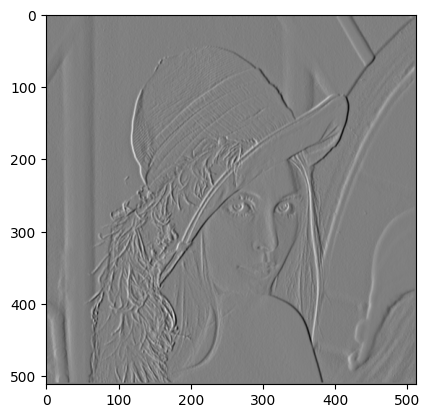

In [103]:
### x 방향으로 3 by 3 sobel 연산자 정의
kernel_x = [[-1,0,1],[-2,0,2],[-1,0,1]]


### 이미지에 커널 적용
image_conv = conv2d(image_gray,kernel_x)


### 해당 이미지 시각화
plt.imshow(image_conv,cmap='gray')
plt.show()

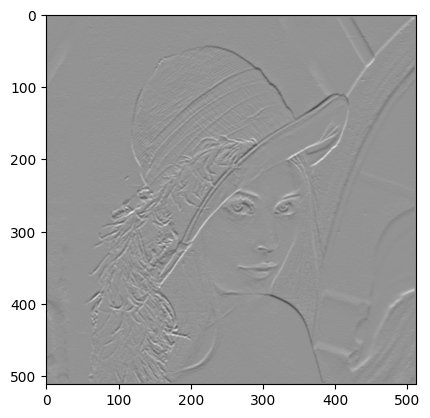

In [100]:
### y 방향으로 3 by 3 sobel 연산자 정의
kernel_y = [[1,2,1],[0,0,0],[-1,-2,-1]]


### 이미지에 커널 적용
image_conv = conv2d(image_gray,kernel_y)


### 해당 이미지 시각화
plt.imshow(image_conv,cmap='gray')
plt.show()

## 7. Sobel Filter (5 points)

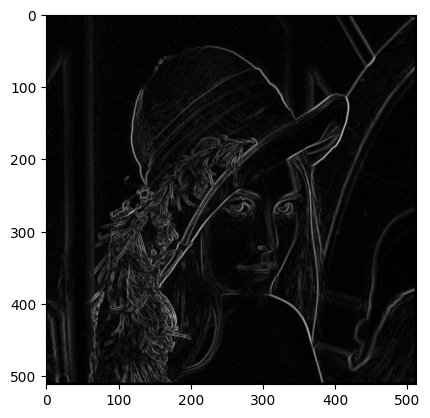

In [107]:
### sobel 필터 정의
# 정의한 x, y 방향의 sobel 필터을 이용하여 이미지의 엣지를 감지하는 함수 구현
# 이미지에 sobel 필터를 적용하고, gradient의 크기 계산
def sobel_filter(image):

    # x, y 방향으로 sobel operator 적용
    gradient_x = conv2d(image,kernel_x)
    gradient_y = conv2d(image,kernel_y)

    # 그래디언트 크기 계산
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)


    return gradient_magnitude


### 불러온 이미지에 sobel 필터 적용
image_sobel = sobel_filter(image_gray)


### 해당 이미지 시각화
plt.imshow(image_sobel,cmap='gray')
plt.show()